# CCPP Dataset

In [1]:
import numpy as np
import pandas as pd
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("CCPP\Folds5x2_pp - Sheet1.csv") 
# df1=pd.read_csv("CCPP\Folds5x2_pp - Sheet2.csv") 
# df2=pd.read_csv("CCPP\Folds5x2_pp - Sheet3.csv") 
# df3=pd.read_csv("CCPP\Folds5x2_pp - Sheet4.csv") 
# df4=pd.read_csv("CCPP\Folds5x2_pp - Sheet5.csv") 

# df=df.append(df1,ignore_index=True)
# df=df.append(df2,ignore_index=True)
# df=df.append(df3,ignore_index=True)
# df=df.append(df4,ignore_index=True)

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
def normalise(df,func):
    maxes=[]
    mins=[]
    for c in df.columns:
        maxes.append(df[c].max())
        mins.append(df[c].min())
    count=0
    for c in df.columns:
        if(func=="tanh"):
            df[c]=(2*df[c]-(maxes[count]+mins[count]))/(maxes[count]-mins[count])
        elif(func=="sigmoid"):
            df[c]=(df[c]-(mins[count]))/(maxes[count]-mins[count])

        count=count+1
    print(mins)
    print(maxes)
    return maxes,mins
#     print(df)

def denormalise(y,func,maxes,mins):
    if(func=="tanh"):
        ynew=(y*(maxes-mins)+(maxes+mins))/2
    elif(func=="sigmoid"):
        ynew=y*(maxes-mins)+mins
    return ynew
    

In [5]:
activation='tanh'

og_y=df['PE']
maxes,mins=normalise(df,activation)
y=np.array(df['PE'].values)
df.drop(['PE'], axis=1,inplace=True)

x=np.array(df.values)

[1.81, 25.36, 992.89, 25.56, 420.26]
[37.11, 81.56, 1033.3, 100.16, 495.76]


In [6]:
df

,AT,V,AP,RH
0,-0.254958,-0.416370,0.543182,0.276408
1,0.324079,0.338078,0.343727,-0.101340
2,-0.813031,-0.500356,-0.046276,0.784987
3,0.079320,0.137367,-0.141302,0.369437
4,-0.489518,-0.567972,-0.191289,0.905094
...,...,...,...,...
9563,-0.159207,-0.134164,0.045286,0.754424
9564,-0.355241,-0.508185,0.523385,0.105094
9565,0.671955,0.742705,-0.008661,-0.707239
9566,0.284419,0.569039,0.037862,-0.012601


In [7]:
pprint(x)
pprint(y)


array([[-0.25495751, -0.41637011,  0.54318238,  0.27640751],
       [ 0.32407932,  0.33807829,  0.3437268 , -0.10134048],
       [-0.81303116, -0.50035587, -0.04627567,  0.7849866 ],
       ...,
       [ 0.67195467,  0.74270463, -0.00866122, -0.70723861],
       [ 0.28441926,  0.56903915,  0.03786192, -0.01260054],
       [ 0.12124646,  0.32241993,  0.20465231,  0.13431635]])
array([ 0.13907285, -0.3613245 ,  0.80927152, ..., -0.75337748,
       -0.58993377, -0.12529801])


In [8]:
len(x)

9568

In [9]:
split=int(0.9*len(x))
X1=x[0:split]
X_test=x[split:]
y1=y[0:split]
y_test=y[split:]

X_valid=[]
y_valid=[]

X_train=[]
y_train=[]
for i in range(len(X1)):
    if(i%5==0):
        X_valid.append(X1[i])
        y_valid.append(y1[i])
    else:
        X_train.append(X1[i])
        y_train.append(y1[i])

X_test=np.array(X_test)
X_valid=np.array(X_valid)
X_train=np.array(X_train)

y_test=np.array(y_test)
y_valid=np.array(y_valid)
y_train=np.array(y_train)



# X_train1, X_test, y_train1, y_test = train_test_split(x, y, test_size=0.1)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

print(y_train)

X_train=np.transpose(X_train) 
X_valid=np.transpose(X_valid)
X_test=np.transpose(X_test) 
# y_train=np.transpose(y_train)
# y_valid=np.transpose(y_valid) 
# y_test=np.transpose(y_test) 

print(y_train.shape)

# X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
y_train=y_train.reshape(1,y_train.shape[0])
# X_valid=X_valid.reshape(X_valid.shape[1],X_valid.shape[0])
y_valid=y_valid.reshape(1,y_valid.shape[0])
# X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])
y_test=y_test.reshape(1,y_test.shape[0])
# print(X_train.shape[1])
print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(6888, 4) (6888,)
(1723, 4) (1723,)
(957, 4) (957,)
[-0.3613245   0.80927152 -0.30543046 ... -0.52264901 -0.62039735
  0.1192053 ]
(6888,)
(4, 6888) (1, 6888)
(4, 1723) (1, 1723)
(4, 957) (1, 957)


In [10]:
X_train

array([[ 0.32407932, -0.81303116,  0.07932011, ...,  0.32691218,
         0.41926346, -0.41416431],
       [ 0.33807829, -0.50035587,  0.13736655, ...,  0.46192171,
         0.60533808,  0.62918149],
       [ 0.3437268 , -0.04627567, -0.14130166, ..., -0.08537491,
        -0.29274932,  0.3199703 ],
       [-0.10134048,  0.7849866 ,  0.369437  , ..., -0.30991957,
         0.25522788,  0.62198391]])

In [11]:
print(y_valid)
print(y_train)
print(y_test)

[[ 0.13907285 -0.37986755 -0.13218543 ... -0.86172185 -0.01483444
   0.23284768]]
[[-0.3613245   0.80927152 -0.30543046 ... -0.52264901 -0.62039735
   0.1192053 ]]
[[-0.1215894   0.41192053  0.1610596  -0.47258278  0.35443709  0.17509934
  -0.28582781 -0.00529801 -0.32688742  0.00662252 -0.33748344 -0.78781457
  -0.05456954 -0.16344371 -0.18754967 -0.45112583  0.05430464 -0.58278146
  -0.66145695 -0.49695364 -0.28476821 -0.59708609 -0.00715232  0.32635762
  -0.37960265 -0.10569536 -0.20847682 -0.35231788  0.53509934  0.04821192
  -0.23655629  0.76344371  0.29774834  0.27682119  0.5607947  -0.72741722
  -0.46463576 -0.65006623 -0.60609272 -0.12927152  0.12794702 -0.29509934
  -0.37086093 -0.21324503 -0.75152318 -0.74384106 -0.60582781 -0.76450331
  -0.72344371 -0.21218543 -0.56556291  0.1605298  -0.40768212  0.71576159
  -0.26410596 -0.6405298   0.19205298 -0.2410596   0.14384106  0.05456954
  -0.44715232  0.72264901 -0.24264901  0.00662252 -0.4794702  -0.85033113
  -0.23311258 -0.56609

In [12]:
# layers_dims = [4,30,15,5,1]
# # layers_dims = [4,1,30,10,1]
# parameters = L_layer_model(X_train, y_train, layers_dims, num_iterations = 5000,learning_rate = 0.01, print_cost = True,
#                            lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,regularisation='L2',  epsilon = 1e-8,activation='tanh')

# Momentum with SGD

Cost after epoch 0: 0.046429  0.038309
Cost after epoch 1: 0.039250  0.041744
Cost after epoch 2: 0.043720  0.046009
Cost after epoch 3: 0.046716  0.047948
Cost after epoch 4: 0.047303  0.048707
Cost after epoch 5: 0.047881  0.048383
Cost after epoch 6: 0.047573  0.047576
Cost after epoch 7: 0.046988  0.047171
Cost after epoch 8: 0.046679  0.046716
Cost after epoch 9: 0.045970  0.046819
Cost after epoch 10: 0.046140  0.046222
Cost after epoch 11: 0.045745  0.046193
Cost after epoch 12: 0.045623  0.045877
Cost after epoch 13: 0.044992  0.046124
Cost after epoch 14: 0.045494  0.045911
Cost after epoch 15: 0.045300  0.045514
Cost after epoch 16: 0.044756  0.045852
Cost after epoch 17: 0.045062  0.045606
Cost after epoch 18: 0.044828  0.045592
Cost after epoch 19: 0.045149  0.045417
Cost after epoch 20: 0.044609  0.045553
Cost after epoch 21: 0.045080  0.045325
Cost after epoch 22: 0.044806  0.045240
Cost after epoch 23: 0.044649  0.045259
Cost after epoch 24: 0.044766  0.045292
Cost after

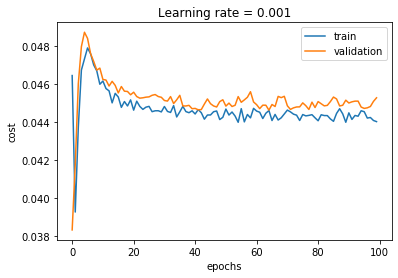

In [13]:
layers_dims = [4,10,10,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 100,
                he_init=True, mini_batch_size = 1,learning_rate = 0.001, print_cost = True,regularisation='L2',lambd=0.1,
                optimizer="momentum", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')


## Corresponding MAPE values

Training mape :  2.0957031219252737
Valid mape :  2.121754615505092
Testing mape :  2.0571719563718958


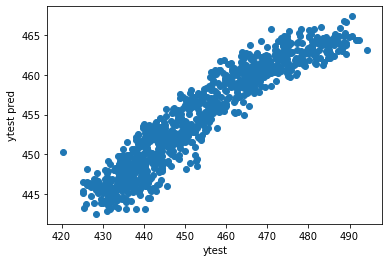

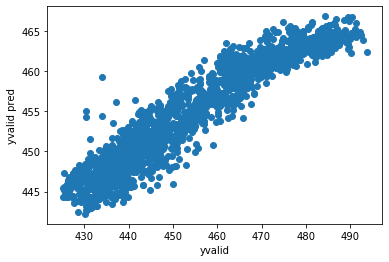

In [17]:
pred_train = predictvals(X_train, parameters,activation=activation)
predtrain_denorm=denormalise(pred_train,activation,maxes[-1],mins[-1])
ytrain_denorm=denormalise(y_train,activation,maxes[-1],mins[-1])
mapeval=mape_cost(ytrain_denorm,predtrain_denorm)
print("Training mape : ",mapeval)

pred_valid = predictvals(X_valid, parameters,activation=activation)
predvalid_denorm=denormalise(pred_valid,activation,maxes[-1],mins[-1])
yvalid_denorm=denormalise(y_valid,activation,maxes[-1],mins[-1])
mapeval=mape_cost(yvalid_denorm,predvalid_denorm)
print("Valid mape : ",mapeval)


pred_test = predictvals(X_test, parameters,activation=activation)
predtest_denorm=denormalise(pred_test,activation,maxes[-1],mins[-1])
ytest_denorm=denormalise(y_test,activation,maxes[-1],mins[-1])
mapeval=mape_cost(ytest_denorm,predtest_denorm)
print("Testing mape : ",mapeval)

# plt.scatter(ytrain_denorm,predtrain_denorm)
# plt.show()
plt.scatter(ytest_denorm,predtest_denorm)
plt.xlabel("ytest")
plt.ylabel("ytest pred")
plt.show()
plt.scatter(yvalid_denorm,predvalid_denorm)
plt.xlabel("yvalid")
plt.ylabel("yvalid pred")

plt.show()

# Adam with Batch/mini batch

Cost after epoch 0: 0.165003  0.134371
Cost after epoch 1: 0.113859  0.094039
Cost after epoch 2: 0.080190  0.066618
Cost after epoch 3: 0.055786  0.045183
Cost after epoch 4: 0.036760  0.028998
Cost after epoch 5: 0.023698  0.018992
Cost after epoch 6: 0.016235  0.013849
Cost after epoch 7: 0.012596  0.011476
Cost after epoch 8: 0.011011  0.010437
Cost after epoch 9: 0.010274  0.009899
Cost after epoch 10: 0.009854  0.009581
Cost after epoch 11: 0.009523  0.009270
Cost after epoch 12: 0.009239  0.009035
Cost after epoch 13: 0.008984  0.008758
Cost after epoch 14: 0.008766  0.008603
Cost after epoch 15: 0.008560  0.008371
Cost after epoch 16: 0.008369  0.008177
Cost after epoch 17: 0.008216  0.008047
Cost after epoch 18: 0.008077  0.007894
Cost after epoch 19: 0.007953  0.007803
Cost after epoch 20: 0.007837  0.007665
Cost after epoch 21: 0.007739  0.007567
Cost after epoch 22: 0.007661  0.007472
Cost after epoch 23: 0.007576  0.007407
Cost after epoch 24: 0.007500  0.007322
Cost after

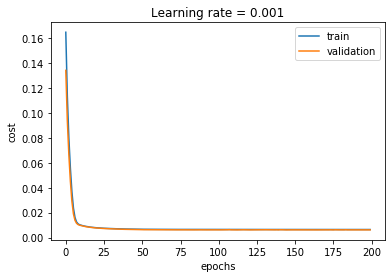

In [18]:
layers_dims = [4,10,10,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 200,
                he_init=True, mini_batch_size =256,learning_rate = 0.001, print_cost = True,regularisation='L2',lambd=0.1,
                    optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')


# Corresponding MAPE values

Training mape :  0.713914740941044
Valid mape :  0.7186748640424897
Testing mape :  0.7255681395060036


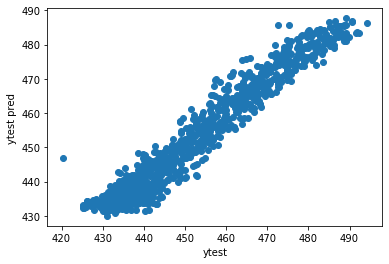

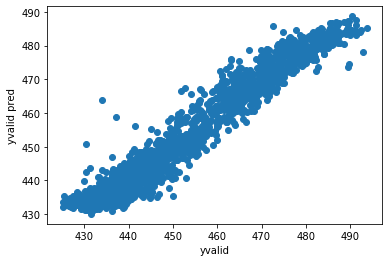

In [19]:
pred_train = predictvals(X_train, parameters,activation=activation)
predtrain_denorm=denormalise(pred_train,activation,maxes[-1],mins[-1])
ytrain_denorm=denormalise(y_train,activation,maxes[-1],mins[-1])
mapeval=mape_cost(ytrain_denorm,predtrain_denorm)
print("Training mape : ",mapeval)

pred_valid = predictvals(X_valid, parameters,activation=activation)
predvalid_denorm=denormalise(pred_valid,activation,maxes[-1],mins[-1])
yvalid_denorm=denormalise(y_valid,activation,maxes[-1],mins[-1])
mapeval=mape_cost(yvalid_denorm,predvalid_denorm)
print("Valid mape : ",mapeval)


pred_test = predictvals(X_test, parameters,activation=activation)
predtest_denorm=denormalise(pred_test,activation,maxes[-1],mins[-1])
ytest_denorm=denormalise(y_test,activation,maxes[-1],mins[-1])
mapeval=mape_cost(ytest_denorm,predtest_denorm)
print("Testing mape : ",mapeval)

# plt.scatter(ytrain_denorm,predtrain_denorm)
# plt.show()
plt.scatter(ytest_denorm,predtest_denorm)
plt.xlabel("ytest")
plt.ylabel("ytest pred")
plt.show()
plt.scatter(yvalid_denorm,predvalid_denorm)
plt.xlabel("yvalid")
plt.ylabel("yvalid pred")

plt.show()

In [ ]:
# reg="none"
# act=activation

# mape=predicterr(X_train,y_train,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

# mape=predicterr(X_valid,y_valid,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

# mape=predicterr(X_test,y_test,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

In [ ]:
# pred_train = predictvals(X_train, parameters,activation=activation)


In [ ]:
# valid_err=predicterr(X_train,y_train,parameters,lambd=0.1,activation='sigmoid',regularisation='L2',cost_func='log')
valid_err=predicterr(X_train,y_train,parameters,lambd=0.1,activation=activation,regularisation='L2',cost_func="mse")

In [ ]:
print(valid_err)

In [ ]:
# pred_test= predictvals(X_test, parameters,activation=activation)
# plt.scatter(X_test[0],pred_test,color='green')
# plt.show()
# plt.scatter(X_test[1],pred_test,color='red')
# plt.show()

# plt.scatter(X_test[2],pred_test,color='orange')
# plt.show()

# plt.scatter(X_test[3],pred_test)

In [ ]:
# # pred_test= predictvals(X_test, parameters,activation='sigmoid')
# plt.scatter(y_test,X_test[0],color='green')
# plt.show()
# plt.scatter(X_test[1],y_test,color='red')
# plt.show()

# plt.scatter(X_test[2],y_test,color='orange')
# plt.show()

# plt.scatter(X_test[3],y_test)

In [ ]:
layers_dims = [4,10,10,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 400,
                he_init=True, mini_batch_size =256,learning_rate = 0.001, print_cost = True,regularisation='L2',lambd=0.1,
                    optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')


In [ ]:
pred_train = predictvals(X_train, parameters,activation=activation)
predtrain_denorm=denormalise(pred_train,activation,maxes[-1],mins[-1])
ytrain_denorm=denormalise(y_train,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print("Training mape : ",mapeval)

pred_valid = predictvals(X_valid, parameters,activation=activation)
predvalid_denorm=denormalise(pred_valid,activation,maxes[-1],mins[-1])
yvalid_denorm=denormalise(y_valid,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print("Valid mape : ",mapeval)


pred_test = predictvals(X_test, parameters,activation=activation)
predtest_denorm=denormalise(pred_test,activation,maxes[-1],mins[-1])
ytest_denorm=denormalise(y_test,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print("Testing mape : ",mapeval)

# plt.scatter(ytrain_denorm,predtrain_denorm)
# plt.show()
plt.scatter(ytest_denorm,predtest_denorm)
plt.xlabel("ytest")
plt.ylabel("ytest pred")
plt.show()
plt.scatter(yvalid_denorm,predvalid_denorm)
plt.xlabel("yvalid")
plt.ylabel("yvalid pred")

plt.show()

In [ ]:
# plt.scatter(ytrain_denorm,predtrain_denorm)
# plt.show()
plt.scatter(ytest_denorm,predtest_denorm)
plt.xlabel("ytest")
plt.ylabel("ytest pred")
plt.show()
plt.scatter(yvalid_denorm,predvalid_denorm)
plt.xlabel("yvalid")
plt.ylabel("yvalid pred")

plt.show()